__Pixelizations__

We'll start by learning about pixelizations, which we typically apply to a source-plane (but could, if we wanted, apply to the image-plane). 

In [1]:
%matplotlib inline

from autolens.model.profiles import mass_profiles as mp
from autolens.model.galaxy import galaxy as g
from autolens.lens import ray_tracing
from autolens.data.array import grids
from autolens.model.inversion import pixelizations as pix
from autolens.model.inversion.plotters import mapper_plotters

Lets setup a lensed source-plane grid, using a lens galaxy and tracer.

In [2]:
image_plane_grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(
    shape=(100, 100), pixel_scale=0.05, sub_grid_size=2)

lens_galaxy = g.Galaxy(
    redshift=0.5, 
    mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=90.0, einstein_radius=1.6))

Our source galaxy doesn't have a light profile from here on, as we're reconstructing its light using a pixelization.

In [4]:
tracer = ray_tracing.TracerImageSourcePlanes(
    lens_galaxies=[lens_galaxy], source_galaxies=[g.Galaxy(redshift=1.0)],
    image_plane_grid_stack=image_plane_grid_stack)

Next, lets set up a pixelization using the 'pixelizations' module, which we've imported as 'pix'.

There are multiple pixelizations available in PyAutoLens, but for now we'll keep it simple and use a uniform rectangular grid. As usual, the grid's 'shape' defines its (y,x) dimensions.

In [5]:
rectangular = pix.Rectangular(
    shape=(25, 25))

By itself, a pixelization doesn't tell us much. It has no grid of coordinates, no image, and nothing which tells it about the lens we're fitting. This information comes when we use the pixelization to set up a 'mapper'. (The 'border=None' will be covered in tutorial 5, so just ignore it for now!)

In [6]:
mapper = rectangular.mapper_from_grid_stack_and_border(
    grid_stack=tracer.source_plane.grid_stack, border=None)

This mapper is a 'RectangularMapper' - every pixelization generates it owns mapper.

In [7]:
print(type(mapper))

<class 'autolens.model.inversion.mappers.RectangularMapper'>


By plotting our mapper, we now see our pixelization. Its a fairly boring grid of rectangular pixels.

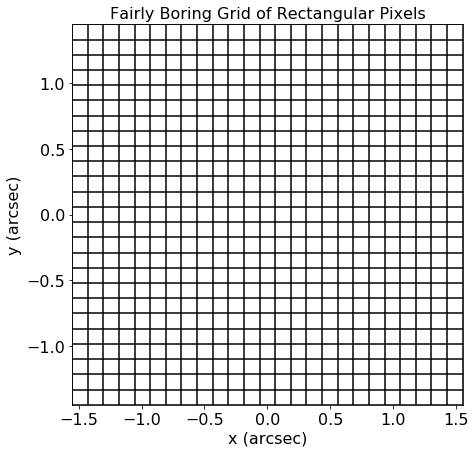

In [8]:
mapper_plotters.plot_rectangular_mapper(
    mapper=mapper, should_plot_grid=False, title='Fairly Boring Grid of Rectangular Pixels')

However, the mapper does contain lots of interesting information about our pixelization, for example its geometry attribute tells us where the pixel centers are located.

In [9]:
print('Rectangular Grid Pixel Centre 1:')
print(mapper.geometry.pixel_centres[0])
print('Rectangular Grid Pixel Centre 2:')
print(mapper.geometry.pixel_centres[1])
print('Rectangular Grid Pixel Centre 3:')
print(mapper.geometry.pixel_centres[2])
print('etc.')

Rectangular Grid Pixel Centre 1:
[ 1.39096755 -1.49068835]
Rectangular Grid Pixel Centre 2:
[ 1.39096755 -1.36646432]
Rectangular Grid Pixel Centre 3:
[ 1.39096755 -1.24224029]
etc.


Infact, we can plot these centre on our grid - to make it look slightly less boring!

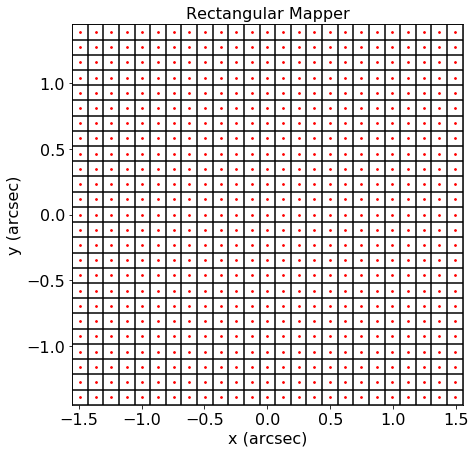

In [10]:
mapper_plotters.plot_rectangular_mapper(
    mapper=mapper, should_plot_grid=False, should_plot_centres=True)

The mapper also has the (source-plane) grid sack that we passed when we set it up. Lets check they're the same.

In [11]:
print('Source Grid Pixel 1')
print(tracer.source_plane.grid_stack.regular[0])
print(mapper.grid_stack.regular[0])
print('Source Grid Pixel 2')
print(tracer.source_plane.grid_stack.regular[1])
print(mapper.grid_stack.regular[1])
print('etc.')

Source Grid Pixel 1
[ 1.43642452 -1.27043929]
[ 1.43642452 -1.27043929]
Source Grid Pixel 2
[ 1.42513796 -1.23184166]
[ 1.42513796 -1.23184166]
etc.


We can over-lay the regular grid on top. Its starting too look a bit less boring now!

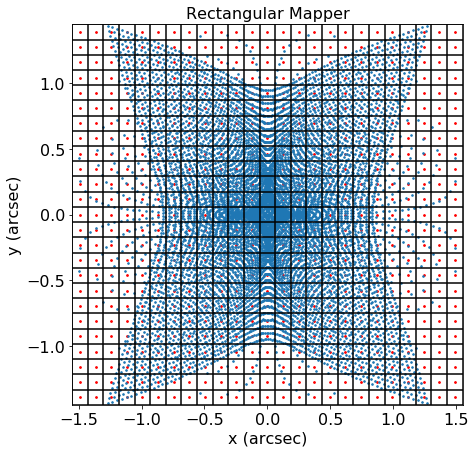

In [12]:
mapper_plotters.plot_rectangular_mapper(
    mapper=mapper, should_plot_centres=True, should_plot_grid=True)

Finally, the mapper and its geometry has lots more information about the pixelization, for example, the arc-second size and dimensions.

In [14]:
print(mapper.geometry.shape_arcsec)
print(mapper.geometry.arc_second_maxima)
print(mapper.geometry.arc_second_minima)

(2.8978490601935625, 3.1056007366248006)
(SubGrid(1.44892453), SubGrid(1.55280037))
(SubGrid(-1.44892453), SubGrid(-1.55280037))


And with that, we're done. This was a relatively gentle introduction in the world of pixelizations, but one that was hopefully easy to follow. Think about the following questions before moving on to the next tutorial:

1) Look at how the source-grid coordinates are distributed over the rectangular pixel-grid. Are these points distributed evenly over the rectangular grid's pixels? Do some pixels have a lot more grid-points inside of them? Do some pixels have no grid-points in them?

2) The rectangular pixelization's edges are aligned with the most exterior coordinates of the source-grid. This is intentional - why do you think this is?